In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)

In [0]:
def compute_biase_variance(regressor, X_train, X_test, y_train, y_test, num_runs=1000, show_info=True):
  """
  :returns: bias (float), variance (float), error (float) 
  """
  # Расчет predictions
  y_predict = np.zeros((n_test, num_runs))
  for i in range(num_runs):
      regressor.fit(X_train[i], y_train[i])
      y_predict[:, i] = regressor.predict(X_test)

  # Расчет Bias^2 + Variance + Error + Noise decomposition of the mean squared error
  y_error = np.zeros(n_test)
  for i in range(num_runs):
      for j in range(num_runs):
          y_error += (y_test[:, j] - y_predict[:, i]) ** 2
  y_error /= (num_runs * num_runs)

  y_noise = np.var(y_test, axis=1)
  y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
  y_var = np.var(y_predict, axis=1)
  if (show_info):
    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
              " + {3:.4f} (var) + {4:.4f} (noise)".format(type(estimator).__name__,
                                                          np.mean(y_error),
                                                          np.mean(y_bias),
                                                          np.mean(y_var),
                                                          np.mean(y_noise)))
  return np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)


In [0]:
n_repeat = 100       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise

# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [41]:
# Размерности
len(X_train), len(y_train), X_test.shape, y_test.shape, X.shape, y.shape, 

(100, 100, (1000, 1), (1000, 100), (50, 1), (50,))

In [42]:
# Линейная регрессия
linear = LinearRegression()
compute_biase_variance(linear, X_train, X_test, y_train, y_test, num_runs=n_repeat)

# Дерево решений
tree = DecisionTreeRegressor()
compute_biase_variance(tree, X_train, X_test, y_train, y_test, num_runs=n_repeat)

# Случайный лес
forest = RandomForestRegressor()
compute_biase_variance(forest, X_train, X_test, y_train, y_test, num_runs=n_repeat)

DecisionTreeRegressor: 0.2429 (error) = 0.2237 (bias^2)  + 0.0094 (var) + 0.0099 (noise)
DecisionTreeRegressor: 0.0249 (error) = 0.0002 (bias^2)  + 0.0147 (var) + 0.0099 (noise)
DecisionTreeRegressor: 0.0187 (error) = 0.0006 (bias^2)  + 0.0082 (var) + 0.0099 (noise)


(0.01868791758687118,
 0.0005694201800204938,
 0.008159751390573657,
 0.009883644740696314)

In [0]:
# Plot figures
def plot_regressor_info(estimators, X_test, y_test, num_runs=1000):
  n_estimators = len(estimators)
  plt.figure(figsize=(30, 8))
  # Loop over estimators to compare
  for n, estimator in enumerate(estimators):
      name = type(estimator).__name__
      # Compute predictions
      y_predict = np.zeros((n_test, n_repeat))
      for i in range(n_repeat):
          y_predict[:, i] = estimator.predict(X_test)

      # Bias^2 + Variance + Noise decomposition of the mean squared error
      y_error = np.zeros(n_test)
      for i in range(n_repeat):
          for j in range(n_repeat):
              y_error += (y_test[:, j] - y_predict[:, i]) ** 2
      y_error /= (n_repeat * n_repeat)
      y_noise = np.var(y_test, axis=1)
      y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
      y_var = np.var(y_predict, axis=1)

      # Plot figures
      plt.subplot(2, n_estimators, n + 1)
      plt.plot(X_test, f(X_test), "b", label="$f(x)$")
      plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

      for i in range(n_repeat):
          if i == 0:
              plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
          else:
              plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
      plt.plot(X_test, np.mean(y_predict, axis=1), "c",
              label=r"$\mathbb{E}_{LS} \^y(x)$")
      plt.xlim([-5, 5])
      plt.title(name)
      if n == n_estimators - 1:
          plt.legend(loc=(1.1, .5))
      plt.subplot(2, n_estimators, n_estimators + n + 1)
      plt.plot(X_test, y_error, "r", label="$error(x)$")
      plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
      plt.plot(X_test, y_var, "g", label="$variance(x)$"),
      plt.plot(X_test, y_noise, "c", label="$noise(x)$")

      plt.xlim([-5, 5])
      plt.ylim([0, 0.1])
      if n == n_estimators - 1:
          plt.legend(loc=(1.1, .5))

  plt.subplots_adjust(right=.75)
  plt.show()

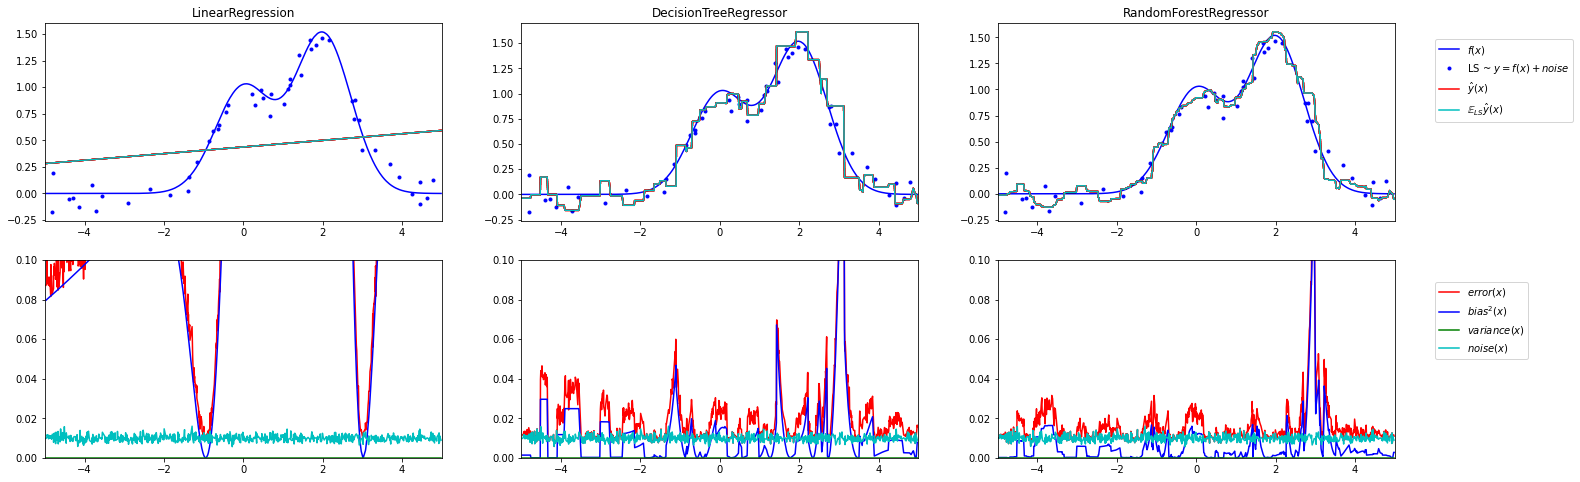

In [44]:
regressors = [linear, tree, forest]
plot_regressor_info(regressors, X_test, y_test, num_runs=n_repeat)

Text(0, 0.5, 'bias')

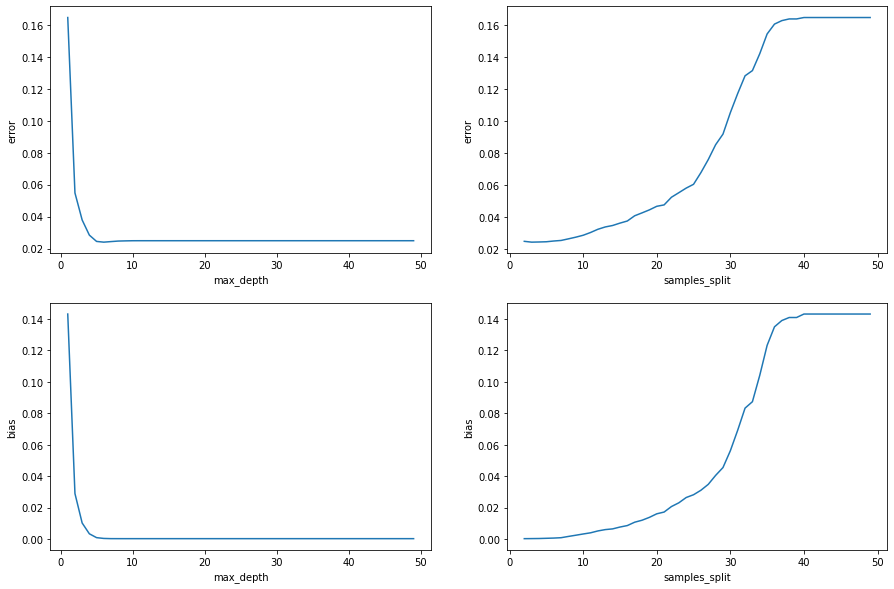

In [81]:
# Зависимость смещения и разброса от гиперпараметров модели DecisionTreeRegressor
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# От max_depth
points = []
errors = []
biases = []
for depth in range(1, 50) :
  tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=2, max_features=None)
  error, bias, var, noise = compute_biase_variance(tree, X_train, X_test, y_train, y_test, num_runs=n_repeat, show_info = False)
  points.append(depth)
  errors.append(error)
  biases.append(bias)
axs[0, 0].plot(points, errors)
axs[0, 0].set_xlabel('max_depth')
axs[0, 0].set_ylabel('error')
axs[1, 0].plot(points, biases)
axs[1, 0].set_xlabel('max_depth')
axs[1, 0].set_ylabel('bias')

# От min_samples_split
points = []
errors = []
biases = []
for samples_split in range(2, 50) :
  tree = DecisionTreeRegressor(max_depth=None, min_samples_split=samples_split, max_features=None)
  error, bias, var, noise = compute_biase_variance(tree, X_train, X_test, y_train, y_test, num_runs=n_repeat, show_info = False)
  points.append(samples_split)
  errors.append(error)
  biases.append(bias)
axs[0, 1].plot(points, errors)
axs[0, 1].set_xlabel('samples_split')
axs[0, 1].set_ylabel('error')
axs[1, 1].plot(points, biases)
axs[1, 1].set_xlabel('samples_split')
axs[1, 1].set_ylabel('bias')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
----------------------
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0, 0.5, 'bias')

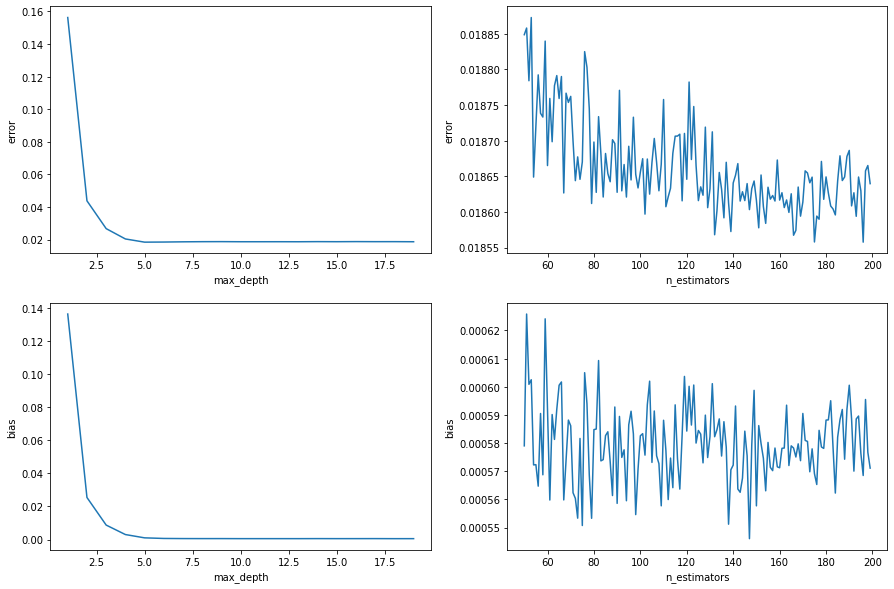

In [82]:
# Зависимость смещения и разброса от гиперпараметров модели RandomForestRegressor
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# От max_depth
points = []
errors = []
biases = []
for depth in range(1, 20) :
  # print(depth)
  forest = RandomForestRegressor(n_estimators=100, max_depth=depth)
  error, bias, var, noise = compute_biase_variance(forest, X_train, X_test, y_train, y_test, num_runs=n_repeat, show_info = False)
  points.append(depth)
  errors.append(error)
  biases.append(bias)
axs[0, 0].plot(points, errors)
axs[0, 0].set_xlabel('max_depth')
axs[0, 0].set_ylabel('error')
axs[1, 0].plot(points, biases)
axs[1, 0].set_xlabel('max_depth')
axs[1, 0].set_ylabel('bias')

print('----------------------')
# От n_estimators
points = []
errors = []
biases = []
for estimators in range(50, 200) :
  # print(estimators)
  forest = RandomForestRegressor(n_estimators=estimators, max_depth=None)
  error, bias, var, noise = compute_biase_variance(forest, X_train, X_test, y_train, y_test, num_runs=n_repeat, show_info = False)
  points.append(estimators)
  errors.append(error)
  biases.append(bias)
axs[0, 1].plot(points, errors)
axs[0, 1].set_xlabel('n_estimators')
axs[0, 1].set_ylabel('error')
axs[1, 1].plot(points, biases)
axs[1, 1].set_xlabel('n_estimators')
axs[1, 1].set_ylabel('bias')